<a href="https://colab.research.google.com/github/gandhimonil9823/CS_GO_Analysis/blob/main/CS_GO_map_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/Shared drives/CS_GO_Data/processed_data_v2'

/content/drive/Shared drives/CS_GO_Data/processed_data_v2


In [11]:
def map_plot(map_name, map_df, dmg_df, meta_df, **kwargs):
    
    b = kwargs.get('bin', '2')
    max_seconds = kwargs.get('max_seconds', 100)
    map_image = kwargs.get('map_image', './'+map_name+'.png')
    
    mp = map_df.loc[map_name]
    extent = [mp['StartX'], mp['EndX'], mp['StartY'], mp['EndY']]
    
    meta_df = meta_df.set_index(['file', 'round'])
    
    df = dmg_df.set_index(['file','round']).join(meta_df[meta_df['map']==map_name], how='inner')
    df['s'] = df['seconds'] - df['start_seconds']
    df = df[(df['s'] < max_seconds) & (df['s'] > 0)]
    df['bin'] = pd.cut(df['s'], 20, labels=list(range(0,20))).astype('str')
    ddf = df.groupby(['file', 'round', 'bin', 'att_side', 'vic_side'])[['s', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y']].first().dropna().reset_index()
    df = ddf[ddf['bin'] == b]
    df2 = pd.concat([df[['att_side', 'att_pos_x', 'att_pos_y']].rename(columns={'att_side':'side', 'att_pos_x':'x', 'att_pos_y':'y'}),
                    df[['vic_side', 'vic_pos_x', 'vic_pos_y']].rename(columns={'vic_side':'side', 'vic_pos_x':'x', 'vic_pos_y':'y'})])
    # df2['z'] = df2['side'] == 'CounterTerrorist'


    bg = imread(map_image)
    fig, ax1 = plt.subplots(1,1,figsize=(18,16))
    ax1.grid(b=True, which='major', color='w', linestyle='--', alpha=0.25)
    ax1.imshow(bg, zorder=0, extent=extent)
    # plt.xlim(0,1024)
    # plt.ylim(0,1024)
    df2[df2['side'] == 'CounterTerrorist'].plot(x='x', y='y', kind='scatter', ax=ax1, color='#3498db', alpha=0.1)
    df2[df2['side'] == 'Terrorist'].plot(x='x', y='y', kind='scatter', ax=ax1, color='#f1c40f', alpha=0.1)
    # ax1.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [7]:
map_df = pd.read_csv('./map_data.csv')
map_df.rename(columns={'Unnamed: 0':'map'}, inplace=True)
map_df.set_index('map', inplace=True)

In [8]:
meta_df = pd.read_csv('./meta_data.csv')

In [9]:
dmg_df = pd.read_csv('./damage_data.csv')

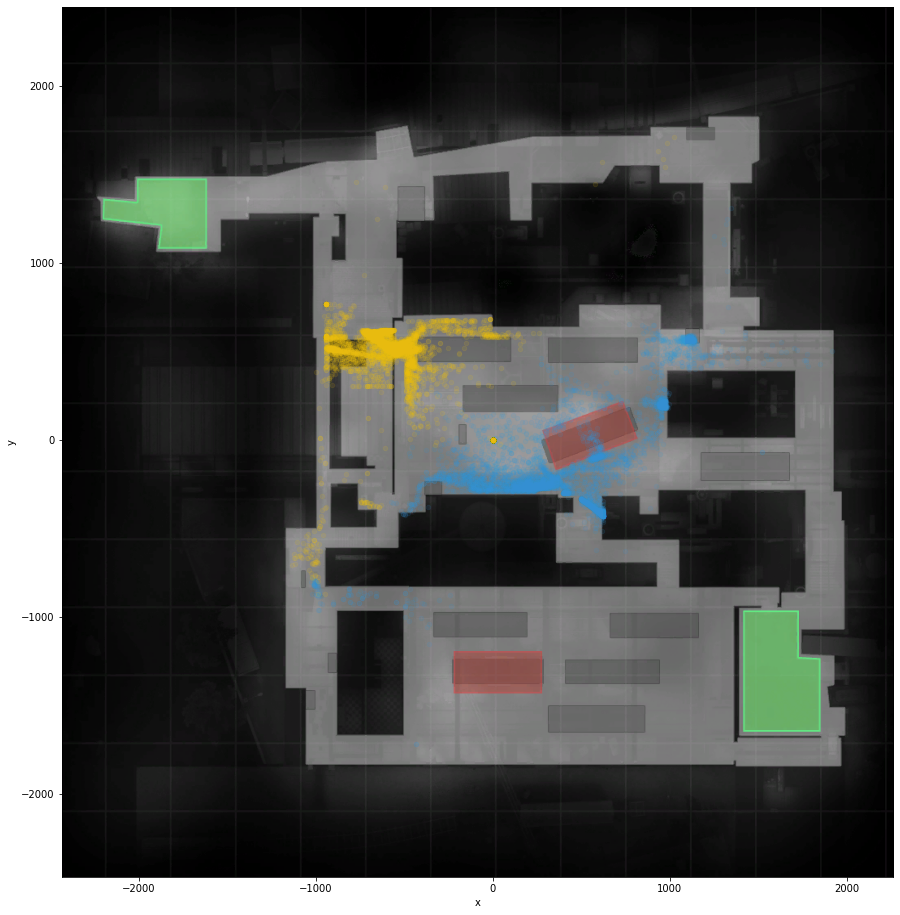

In [12]:
map_plot('de_train', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_train.png')

In [ ]:
map_plot('de_cache', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_cache.png')

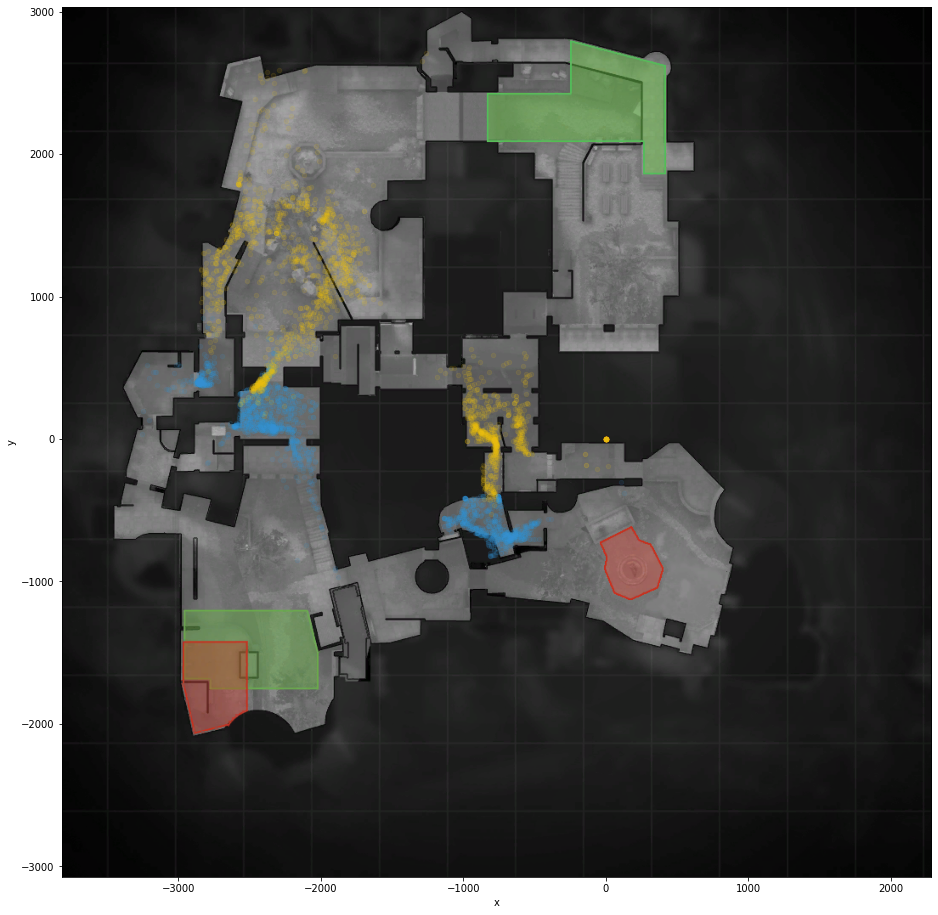

In [ ]:
map_plot('de_cbble', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_cbble.png')

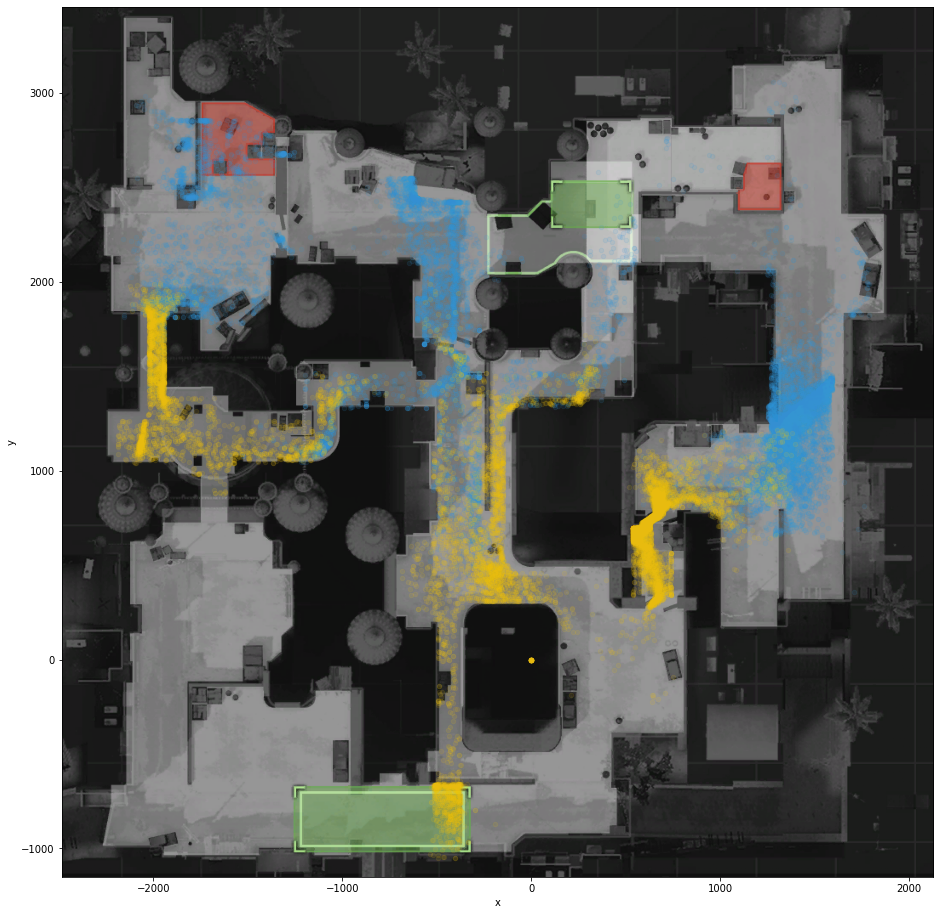

In [ ]:
map_plot('de_dust2', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_dust2.png')

In [ ]:
map_plot('de_inferno', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_inferno.png')

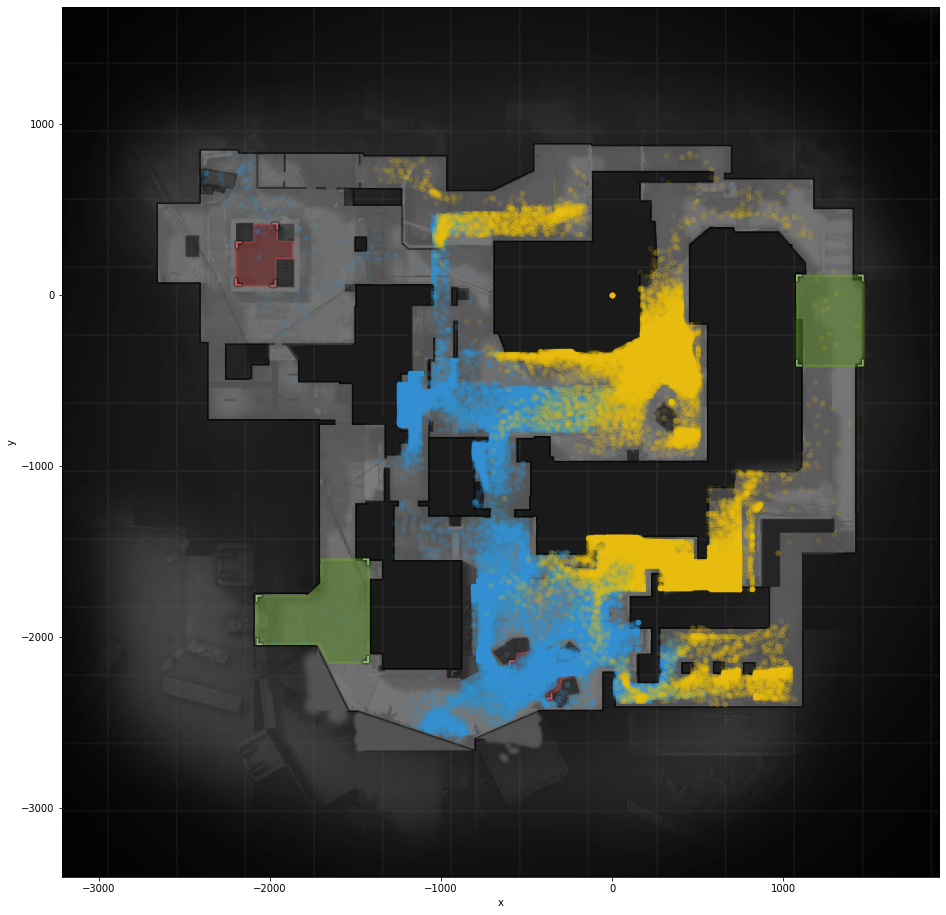

In [ ]:
map_plot('de_mirage', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_mirage.png')

In [ ]:
map_plot('de_overpass', map_df, dmg_df, meta_df, map_image='/content/drive/Shared drives/CS_GO_Data/de_overpass.png')